<a href="https://colab.research.google.com/github/saugatp/Dissertation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install bertopic
%pip install cleantext
%pip install gensim


In [2]:
import pandas as pd

**Reading the dataset that is extracted using python and scraped from google play store as well as app store.**

In [3]:
data = pd.read_csv("reviews_facebook.csv")
data.head()

,Content,Date,Rating
0,"""Open in External Browser"" has been broken for...",2024-04-09 01:29:41,1
1,"It's worked in the past, but for the last few ...",2024-04-14 20:28:10,1
2,Facebook apparently did not test the new layou...,2024-04-11 18:51:41,2
3,"HELP! I have a Galaxy Z-Fold, and since the la...",2024-04-23 16:21:02,3
4,I can't get rid of the AI search. I've followe...,2024-04-24 20:15:14,1


In [4]:
%pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=dc22206a3734c3af2ebc8fb2e1c6e09f407d8027de6904ad1e774614938bc97d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")

In [6]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
%%capture
import cleantext
def clean_text(text):
    cleaned_text = cleantext.clean(text,
                         clean_all= False, # Execute all cleaning operations
                            extra_spaces=True ,  # Remove extra white spaces
                            stemming=False , # Stem the words
                            lowercase=True ,# Convert to lowercase
                            numbers=True ,# Remove all digits
                            punct=True , # Remove punctuation
                                   stp_lang='english') # Set language to English
    return cleaned_text

#Lemmatization and stop word removal
- This part is for text preprocessing tasks such as lemmatization
(converting words to their base form) and stopwords removal (filtering out common words like 'an', 'the', etc) to prepare the text data for further analysis.

In [8]:
%%capture
data['Document'] = data['Content'].apply(clean_text)

In [9]:
data[['Content','Document']].head()

,Content,Document
0,"""Open in External Browser"" has been broken for...",open in external browser has been broken for q...
1,"It's worked in the past, but for the last few ...",its worked in the past but for the last few da...
2,Facebook apparently did not test the new layou...,facebook apparently did not test the new layou...
3,"HELP! I have a Galaxy Z-Fold, and since the la...",help i have a galaxy zfold and since the last ...
4,I can't get rid of the AI search. I've followe...,i cant get rid of the ai search ive followed i...


# Bertopic for topic modelling
- Here, for topic modelling, Bertopic is used which uses a BERT transformer model for better topic modelling and also date is analysed for gathering trends over time.

In [10]:
from bertopic import BERTopic

In [11]:
from bertopic.representation import MaximalMarginalRelevance
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5,
                  min_dist=0.0, metric='cosine', random_state=42)
#from bertopic.representation import KeyBERTInspired

representation_model = MaximalMarginalRelevance(diversity=0.33)
#representation_model = KeyBERTInspired()

topic_model = BERTopic(verbose=True, nr_topics="auto", representation_model=representation_model, umap_model=umap_model)

#Calculating time for fitting models

%time topics, probs = topic_model.fit_transform(data.Document)

2024-05-13 18:17:46,610 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/113 [00:00<?, ?it/s]

2024-05-13 18:20:12,559 - BERTopic - Embedding - Completed ✓
2024-05-13 18:20:12,561 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-13 18:20:44,291 - BERTopic - Dimensionality - Completed ✓
2024-05-13 18:20:44,294 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-13 18:20:44,440 - BERTopic - Cluster - Completed ✓
2024-05-13 18:20:44,442 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-13 18:20:51,336 - BERTopic - Representation - Completed ✓
2024-05-13 18:20:51,342 - BERTopic - Topic reduction - Reducing number of topics
2024-05-13 18:20:55,770 - BERTopic - Topic reduction - Reduced number of topics from 39 to 26


CPU times: user 2min 56s, sys: 8.31 s, total: 3min 4s
Wall time: 3min 9s


In [12]:
# Preprocess Documents
documents = pd.DataFrame({"Document": data.Document,
                          "ID": range(len(data.Document)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)


# Topic coherece
Calculating the coherence score for generated topics

In [13]:
from gensim import corpora
from gensim.models import CoherenceModel
# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

# Result of coherence for topics generated with bertopic

In [14]:
coherence

0.48786319823259633

# Trend analysis of topics
Identifying trends across topics and analysing the topics that might need more introspection

In [15]:
timestamps = data.Date.to_list()

In [16]:
topics_over_time = topic_model.topics_over_time(data.Document, timestamps, nr_bins=10)

10it [00:27,  2.77s/it]


# Topic visualisation
Using bert model, the topics are extracted and top words in the topic  are visualised per score.

In [17]:
topic_model.visualize_heatmap(title="Similarity matrix(Amazon Prime reviews)")

In [18]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(data.Document, show_progress_bar=True)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

Batches:   0%|          | 0/113 [00:00<?, ?it/s]

Total number of topics generated

In [19]:
# topic_model.visualize_documents(data.Document, reduced_embeddings=reduced_embeddings)
bertopic_generated_topics = len(topic_model.get_topics())
bertopic_generated_topics

26

In [20]:
topic_model.visualize_barchart(title="Topic word score(Amazon Prime reviews)")

Topics discussed over time are visualised using chart. This chart will help understand the trends in topic discussed. Recent discussion means topics that needed top be discussed more. Decrease in trend mean the topics if about negative, can be discarded.

In [21]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6, title="Topics trends over time(Amazon Prime reviews)")

Hierarchical clustering of topics, helps us understand relationship between the topics discussed.

In [22]:
hierarchical_topics = topic_model.hierarchical_topics(data.Document)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, title="Topics hierarchy(Amazon Prime reviews)")

100%|██████████| 24/24 [00:04<00:00,  5.78it/s]


In [23]:
data_topic = topic_model.get_document_info(data.Document)
data_topic.columns

Index(['Document', 'Topic', 'Name', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document'],
      dtype='object')

# Sentiment analysis on each topic and calculating the sentiment scores
In this phase, sentiment analysis is done on each document and are gathered to make a chart of sentiments across different topics. More negative sentiments in any topic means there is a need of

In [24]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [25]:
nltk.download('vader_lexicon')

True

In [26]:
# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

In [27]:
data_topic['sentiment_scores'] = data_topic['Document'].apply(get_sentiment_scores)
# Extract compound score and sentiment label
data_topic['compound'] = data_topic['sentiment_scores'].apply(lambda x: x['compound'])
data_topic['sentiment_label'] = data_topic['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Grouping data based on rating and sentiments
Taking top 6 topics and amount of sentiments for each topics

In [28]:
import pandas as pd

merged_data = data.merge(data_topic, on='Document')
merged_data.head()

,Content,Date,Rating,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,sentiment_scores,compound,sentiment_label
0,"""Open in External Browser"" has been broken for...",2024-04-09 01:29:41,1,open in external browser has been broken for q...,11,11_browser_links_opening_app,"[browser, links, opening, app, default, extern...",[after the outage the app removed the ability ...,browser - links - opening - app - default - ex...,1.0,False,"{'neg': 0.107, 'neu': 0.833, 'pos': 0.06, 'com...",-0.5859,Negative
1,"It's worked in the past, but for the last few ...",2024-04-14 20:28:10,1,its worked in the past but for the last few da...,1,1_screen_fold_bar_update,"[screen, fold, bar, update, navigation, app, s...",[can meta please explain to me why with the ne...,screen - fold - bar - update - navigation - ap...,1.0,False,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.8653,Negative
2,Facebook apparently did not test the new layou...,2024-04-11 18:51:41,2,facebook apparently did not test the new layou...,1,1_screen_fold_bar_update,"[screen, fold, bar, update, navigation, app, s...",[can meta please explain to me why with the ne...,screen - fold - bar - update - navigation - ap...,1.0,False,"{'neg': 0.065, 'neu': 0.898, 'pos': 0.038, 'co...",-0.5574,Negative
3,"HELP! I have a Galaxy Z-Fold, and since the la...",2024-04-23 16:21:02,3,help i have a galaxy zfold and since the last ...,-1,-1_to_facebook_app_account,"[to, facebook, app, account, have, on, cant, b...",[i think facebook is pretty fun to use it has ...,to - facebook - app - account - have - on - ca...,0.0,False,"{'neg': 0.067, 'neu': 0.76, 'pos': 0.172, 'com...",0.7430,Positive
4,I can't get rid of the AI search. I've followe...,2024-04-24 20:15:14,1,i cant get rid of the ai search ive followed i...,6,6_ai_search_meta_want,"[ai, search, meta, want, option, disable, off,...",[since they removed the old search function an...,ai - search - meta - want - option - disable -...,1.0,False,"{'neg': 0.056, 'neu': 0.895, 'pos': 0.049, 'co...",-0.1396,Negative


In [29]:
topic_rating_data = merged_data[['Rating','Topic']]
topic_sentiment_data = merged_data[['sentiment_label', 'Topic']]
topic_rating_data.tail()

,Rating,Topic
3603,1,0
3604,2,5
3605,1,-1
3606,1,6
3607,3,1


In [30]:
topic_sentiment_data.tail()

,sentiment_label,Topic
3603,Negative,0
3604,Positive,5
3605,Positive,-1
3606,Neutral,6
3607,Negative,1


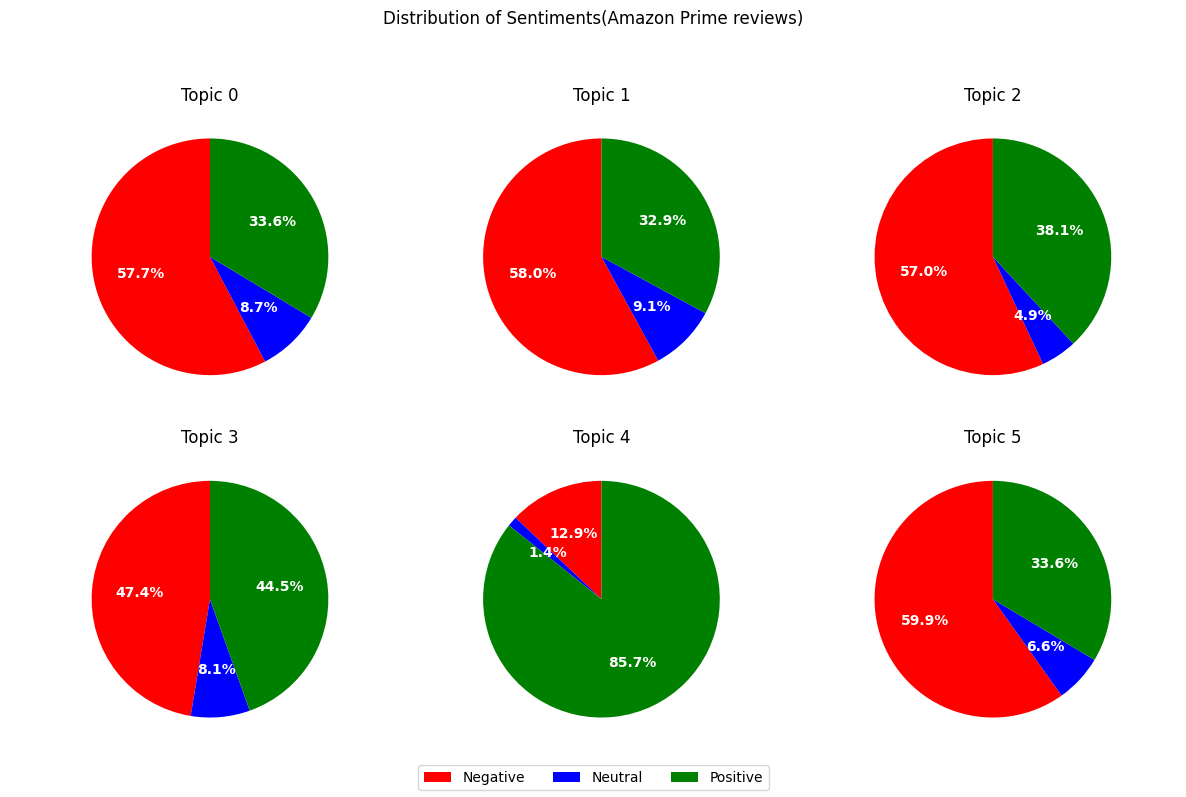

In [31]:
import matplotlib.pyplot as plt
import numpy as np


topic_counts_sentiment = topic_sentiment_data['Topic'].value_counts()
top_topics_sentiment = topic_counts_sentiment[1:7]
textprops = {'color': 'white', 'weight': 'bold'}

topic_sentiment_counts = []
for topic in top_topics_sentiment.index:
    sentiment_count = topic_sentiment_data[topic_sentiment_data['Topic'] == topic]['sentiment_label'].value_counts().sort_index()
    topic_sentiment_counts.append(sentiment_count)

colors = ['red', 'blue', 'green']
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Distribution of Sentiments(Amazon Prime reviews)')

axs = axs.flatten()

for i, (topic, counts) in enumerate(zip(top_topics_sentiment.index, topic_sentiment_counts)):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops=textprops)
    axs[i].set_title(f'Topic {topic}')

sentiment_labels = ['Negative','Neutral','Positive']
fig.legend(sentiment_labels, loc='lower center', ncol=5)

for j in range(len(top_topics_sentiment), len(axs)):
    axs[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

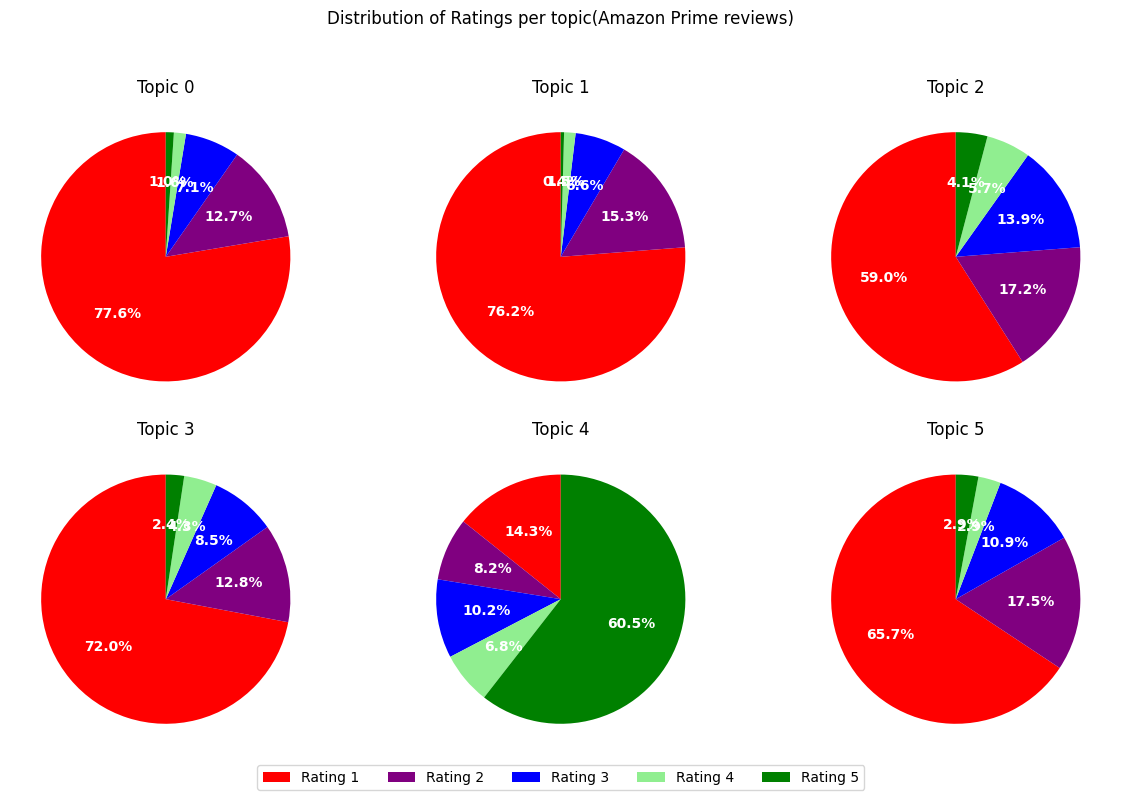

In [32]:
topic_counts = topic_rating_data['Topic'].value_counts()

top_topics = topic_counts[1:7]
textprops = {'color': 'white', 'weight': 'bold'}

topic_rating_counts = []
for topic in top_topics.index:
    ratings_count = topic_rating_data[topic_rating_data['Topic'] == topic]['Rating'].value_counts().sort_index()
    topic_rating_counts.append(ratings_count)

colors = ['red', 'purple','blue','lightgreen', 'green']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Distribution of Ratings per topic(Amazon Prime reviews)')

axs = axs.flatten()

for i, (topic, counts) in enumerate(zip(top_topics.index, topic_rating_counts)):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops=textprops)
    axs[i].set_title(f'Topic {topic}')

rating_labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
fig.legend(rating_labels, loc='lower center', ncol=5)

for j in range(len(top_topics), len(axs)):
    axs[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [33]:
topic_model.get_representative_docs(3)

['i dont see many posts from my friends but i sure see lots of bullcrap ads that i ask to be blocked and they are right back again most of my facebook today has been constant ads so i uninstalled it from my phone for now i used to enjoy the laughs and my recipe groups but things that dont pertain to me i dont want to see especially when i have to look up friends to see their posts but ads are all over if it continues on my other devices facebook can kiss me where the sun doesnt shine',
 'facebook used to be fun now however its all ads ads ads they push ads on you in everything ive hidden all ads by s of different things and still see the same ads ive blocked the profiles of the advertisers in addition to hiding all ads and still see the ads every  video is followed by  ads then they tuck ads in the bottom of videos that arent ads its beyond ridiculous facebook flat out sucks if its not ads its spam or scams  star is beyond generous',
 'you cant get rid of irrelevant ads or posts that y

In [34]:
topic_model.get_topic_info(3)[['Topic', 'Count', 'Representation']]


,Topic,Count,Representation
0,3,211,"[ads, posts, friends, to, suggested, ad, follo..."


## LDA topic modelling
Topic modelling with LDA and visualising using gensim visualisation. Comparing the outputs and topics generated using the same dataset for LDA and BERTopic topic modelling techniques.

In [35]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel


In [36]:
!pip install pyLDAvis
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00


# Topic modelling with LDA
This section, I am implementing the LDA method for topic modelling for the same dataset as above and calculating time as well as coherence score for comparison.

In [37]:
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import json
%matplotlib inline

In [38]:
def clean_text_lemmatize(text):
    cleaned_text = cleantext.clean(text,
                         clean_all= False, # Execute all cleaning operations
                            extra_spaces=True ,  # Remove extra white spaces
                            stemming=True , # Stem the words
                            lowercase=True ,# Convert to lowercase
                            numbers=True ,# Remove all digits
                            punct=True , # Remove punctuation
                                   stp_lang='english') # Set language to English
    return cleaned_text

In [39]:
# Apply the clean_text function to the 'reviews' column
data['cleaned_reviews'] = data['Content'].apply(clean_text_lemmatize)

In [40]:
data['cleaned_reviews']

0       open in extern browser ha been broken for quit...
1       it work in the past but for the last few day a...
2       facebook appar did not test the new layout on ...
3       help i have a galaxi zfold and sinc the last u...
4       i cant get rid of the ai search ive follow ins...
                              ...                        
3595    i made a nd account but now i cant login to it...
3596    i have use thi app and the same account for ab...
3597    it blew up my phone hi i download facebook for...
3598    whi did they replac the search bar with the me...
3599    same issu as the other fold user i see in the ...
Name: cleaned_reviews, Length: 3600, dtype: object

## Extracting bigrams and trigrams

In [41]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in data.cleaned_reviews])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [42]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in data.cleaned_reviews])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

In [43]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [44]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [45]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [46]:
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True

In [47]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
nltk.download('averaged_perceptron_tagger')

filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [48]:
bigrams[:10]


['social media',
 'unexpect error',
 'z fold',
 'session expir',
 'navig bar',
 'galaxi fold',
 'news feed',
 'left side',
 'wont let',
 'front screen']

In [49]:
trigrams[:10]


['say session expir',
 'wont let me',
 'left side of',
 'uninstal and reinstal',
 'in touch with',
 'the navig bar',
 'the left side',
 'friend and famili',
 'log back in',
 'i dont know']

In [50]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [51]:
reviews_w_ngrams = data.copy()

In [52]:
reviews_w_ngrams.reviewText = reviews_w_ngrams.cleaned_reviews.map(lambda x: replace_ngram(x))

In [53]:
reviews_w_ngrams.head()

,Content,Date,Rating,Document,cleaned_reviews
0,"""Open in External Browser"" has been broken for...",2024-04-09 01:29:41,1,open in external browser has been broken for q...,open in extern browser ha been broken for quit...
1,"It's worked in the past, but for the last few ...",2024-04-14 20:28:10,1,its worked in the past but for the last few da...,it work in the past but for the last few day a...
2,Facebook apparently did not test the new layou...,2024-04-11 18:51:41,2,facebook apparently did not test the new layou...,facebook appar did not test the new layout on ...
3,"HELP! I have a Galaxy Z-Fold, and since the la...",2024-04-23 16:21:02,3,help i have a galaxy zfold and since the last ...,help i have a galaxi zfold and sinc the last u...
4,I can't get rid of the AI search. I've followe...,2024-04-24 20:15:14,1,i cant get rid of the ai search ive followed i...,i cant get rid of the ai search ive follow ins...


In [54]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



In [55]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
from nltk.corpus import stopwords

reviews_w_ngrams = reviews_w_ngrams.cleaned_reviews.map(lambda x: [word for word in x.split()\
                                                 if word not in stopwords.words('english')\
                                                              and len(word) > 2])

In [56]:
reviews_w_ngrams.head()


0    [open, extern, browser, broken, quit, time, ev...
1    [work, past, last, day, updat, perhap, phone, ...
2    [facebook, appar, test, new, layout, mani, dev...
3    [help, galaxi, zfold, sinc, last, updat, faceb...
4    [cant, get, rid, search, ive, follow, instruct...
Name: cleaned_reviews, dtype: object

In [57]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [58]:
final_reviews = reviews_w_ngrams #.map(noun_only)


In [59]:
final_reviews.head()

0    [open, extern, browser, broken, quit, time, ev...
1    [work, past, last, day, updat, perhap, phone, ...
2    [facebook, appar, test, new, layout, mani, dev...
3    [help, galaxi, zfold, sinc, last, updat, faceb...
4    [cant, get, rid, search, ive, follow, instruct...
Name: cleaned_reviews, dtype: object

Topic modelling

In [60]:
from gensim import corpora
import pyLDAvis.gensim_models
from gensim import models, similarities
import gensim

dictionary = corpora.Dictionary(final_reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

# Coherence based on topics
Running topic modelling by choosing number of topics ranging from 5-25 and calculating the coherence score.

In [61]:
coherence = []
for k in range(10, 22):
    print('Topics: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))
    print(cm.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topics: 10
0.4273146815720918
Topics: 11
0.42651858923051444
Topics: 12
0.4226164696947678
Topics: 13
0.43341982496557324
Topics: 14
0.42429423846456266
Topics: 15
0.40512876753148264
Topics: 16
0.4202811569172372
Topics: 17
0.4007605230865474
Topics: 18
0.3871213841497603
Topics: 19
0.39184127298247534
Topics: 20
0.40550584609380574
Topics: 21
0.39900331644899045


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



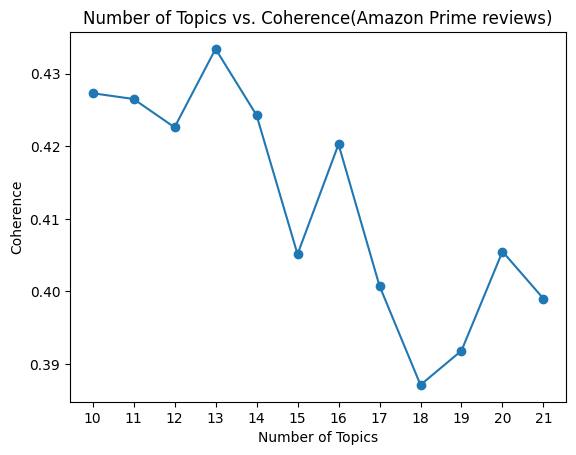

In [62]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence(Amazon Prime reviews)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

Observing the output, the coherence is highest whent the topics are 7, so we might get better accuracy by choosing 7 topics for modelling
- Passes: The number of times model iterates through the whole corpus
- Iterations: The number of iterations the model trains on each pass
- Chunk size: Number of rows that are taken to train the model each

In [63]:
Lda = gensim.models.ldamodel.LdaModel
%time ldamodel = Lda(doc_term_matrix, num_topics=bertopic_generated_topics, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CPU times: user 1min 1s, sys: 424 ms, total: 1min 1s
Wall time: 1min 1s


In [64]:
cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
print(cm.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.3901012540241186


In [65]:
ldamodel.show_topics(13, num_words=10, formatted=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(11,
  [('facebook', 0.06588158),
   ('thi', 0.045608614),
   ('problem', 0.02223313),
   ('issu', 0.019724764),
   ('fix', 0.01660236),
   ('like', 0.016371252),
   ('use', 0.014739746),
   ('app', 0.0141144795),
   ('pleas', 0.01363695),
   ('thank', 0.012631457)]),
 (14,
  [('notif', 0.10066923),
   ('facebook', 0.0224236),
   ('messag', 0.021228913),
   ('turn', 0.020830339),
   ('fix', 0.018466972),
   ('dont', 0.01678761),
   ('get', 0.0161945),
   ('show', 0.015206322),
   ('even', 0.013867233),
   ('thi', 0.013106905)]),
 (9,
  [('star', 0.039030936),
   ('give', 0.021941612),
   ('app', 0.020329382),
   ('thi', 0.01978871),
   ('would', 0.019320328),
   ('could', 0.015109786),
   ('zero', 0.0121583),
   ('experi', 0.010526563),
   ('rate', 0.010079383),
   ('use', 0.009581045)]),
 (1,
  [('updat', 0.031188818),
   ('app', 0.022817558),
   ('like', 0.017608462),
   ('facebook', 0.015076962),
   ('thi', 0.013108651),
   ('phone', 0.012649376),
   ('cant', 0.012577341),
   ('use

In [66]:
%pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:

topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



In [68]:
all_topics = {}
num_terms = 8 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,10): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
pd.DataFrame(all_topics).T



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7
Topic 1,account,password,log,code,email,tri,login,number
Topic 2,screen,fold,side,bar,left,navig,top,updat
Topic 3,log,session,expir,app,uninstal,reinstal,tri,error
Topic 4,video,reel,watch,play,app,click,updat,open
Topic 5,see,page,post,feed,dont,follow,want,group
Topic 6,post,friend,see,add,cant,suggest,time,peopl
Topic 7,account,link,hack,browser,facebook,contact,extern,open
Topic 8,facebook,thi,problem,team,thank,hope,issu,upload
Topic 9,friend,famili,touch,peopl,facebook,world,best,love


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

